In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
#IMPORTING THE DATASET

yield_df = pd.read_csv("C:/Users/Joel/Documents/PYTHON/CAPSTONE/yield_df.csv")

yield_df

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...,...
28237,28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [3]:
#DATA CLEANING

yield_df.columns = yield_df.columns.str.strip()

yield_df.sort_values(by="hg/ha_yield", inplace = True, ascending=False)

yield_df

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
2470,2470,Belgium,Potatoes,2011,501412,847.0,5740.44,11.69
21297,21297,New Zealand,Potatoes,2010,495751,1732.0,5086.00,13.54
21301,21301,New Zealand,Potatoes,2011,490361,1732.0,5086.00,13.46
26103,26103,Switzerland,Potatoes,1996,487219,1537.0,1746.30,6.66
21305,21305,New Zealand,Potatoes,2012,484810,1732.0,5086.00,12.89
...,...,...,...,...,...,...,...,...
26263,26263,Tajikistan,Soybeans,2008,112,691.0,253.50,8.29
26186,26186,Tajikistan,Soybeans,1994,111,691.0,714.00,8.01
26240,26240,Tajikistan,Soybeans,2004,100,691.0,228.50,9.24
26180,26180,Tajikistan,Soybeans,1993,80,691.0,2280.00,7.29


In [4]:
yield_df.drop('Unnamed: 0', axis=1, inplace=True)

yield_df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
2470,Belgium,Potatoes,2011,501412,847.0,5740.44,11.69
21297,New Zealand,Potatoes,2010,495751,1732.0,5086.00,13.54
21301,New Zealand,Potatoes,2011,490361,1732.0,5086.00,13.46
26103,Switzerland,Potatoes,1996,487219,1537.0,1746.30,6.66
21305,New Zealand,Potatoes,2012,484810,1732.0,5086.00,12.89
...,...,...,...,...,...,...,...
26263,Tajikistan,Soybeans,2008,112,691.0,253.50,8.29
26186,Tajikistan,Soybeans,1994,111,691.0,714.00,8.01
26240,Tajikistan,Soybeans,2004,100,691.0,228.50,9.24
26180,Tajikistan,Soybeans,1993,80,691.0,2280.00,7.29


In [5]:
yield_df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
2470,Belgium,Potatoes,2011,501412,847.0,5740.44,11.69
21297,New Zealand,Potatoes,2010,495751,1732.0,5086.00,13.54
21301,New Zealand,Potatoes,2011,490361,1732.0,5086.00,13.46
26103,Switzerland,Potatoes,1996,487219,1537.0,1746.30,6.66
21305,New Zealand,Potatoes,2012,484810,1732.0,5086.00,12.89
...,...,...,...,...,...,...,...
26263,Tajikistan,Soybeans,2008,112,691.0,253.50,8.29
26186,Tajikistan,Soybeans,1994,111,691.0,714.00,8.01
26240,Tajikistan,Soybeans,2004,100,691.0,228.50,9.24
26180,Tajikistan,Soybeans,1993,80,691.0,2280.00,7.29


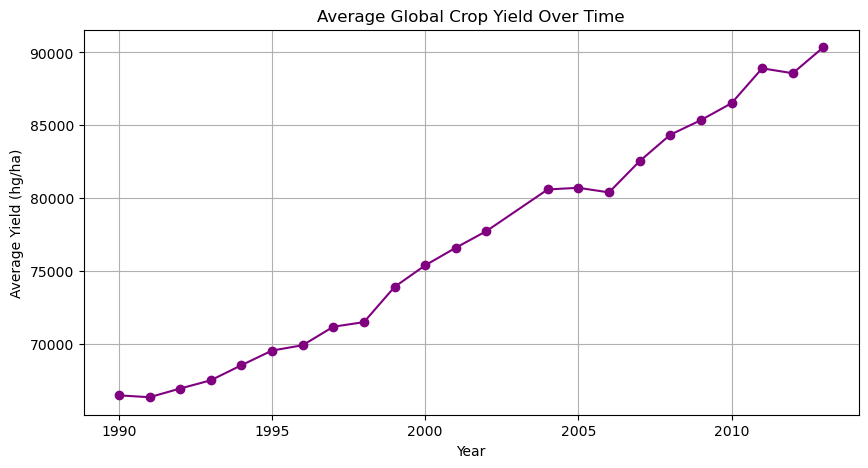

**Top 5 Highest Yielding Crops:**
Item
Potatoes                199801.549579
Cassava                 150479.466993
Sweet potatoes          119057.793772
Yams                    114140.345927
Plantains and others    106041.320144
Name: hg/ha_yield, dtype: float64
**Buttom 5 Lowest Yielding Crops:**
Item
Rice, paddy    40730.434770
Maize          36310.070614
Wheat          30116.267825
Sorghum        18635.777229
Soybeans       16731.092771
Name: hg/ha_yield, dtype: float64


In [6]:
#Q1: HOW HAS THE AVERAGE GLOBAL CROP YIELD CHANGED OVER THE YEARS?
#Q2: WHICH CROPS TYPICALLY HAVE THE HIGHEST/LOWEST YIELDS?

#GLOBAL AVERAGE YIELD PER YEAR
total_yield_by_year = yield_df.groupby("Year")["hg/ha_yield"].mean()

#AVERAGE YIELD FOR EACH CROP (ITEM)
crop_yield = yield_df.groupby("Item")["hg/ha_yield"].mean().sort_values(ascending = False)

#PLOTTING THE TIME TREND
plt.figure(figsize= (10, 5))
total_yield_by_year.plot(kind="line", marker = "o", color = "purple")
plt.title("Average Global Crop Yield Over Time")
plt.xlabel("Year")
plt.ylabel("Average Yield (hg/ha)")
plt.grid(True)

plt.show()

#DISPLAYING TOP/BUTTOM CROPS
print("**Top 5 Highest Yielding Crops:**")
print(crop_yield.head(5))
print("**Buttom 5 Lowest Yielding Crops:**")
print(crop_yield.tail(5))

**Top 5 Highest Yielding Countries(Area):**
Area
United Kingdom    240956.478261
Belgium           216468.461538
Denmark           214033.020000
Netherlands       204151.202899
Ireland           197913.695652
Name: hg/ha_yield, dtype: float64
**Buttom 5 Lowest Yielding Countries(Area):**
Area
Burkina Faso                33061.614130
Mauritania                  27738.142857
Central African Republic    26432.465839
Eritrea                     18155.200000
Botswana                     7353.921875
Name: hg/ha_yield, dtype: float64


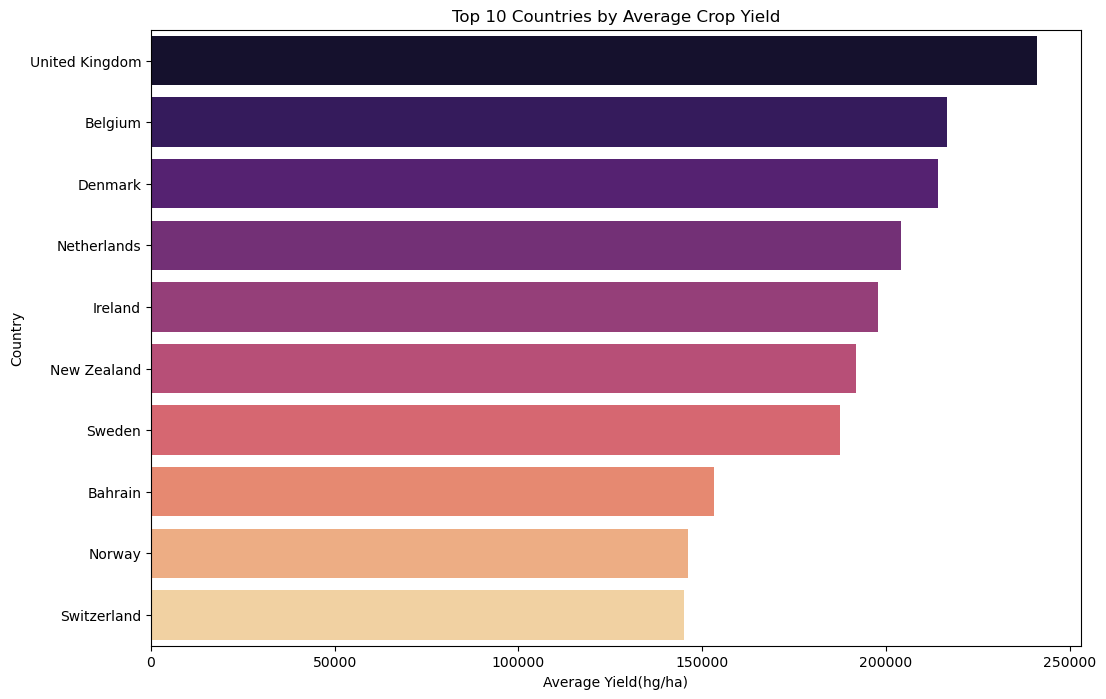

In [7]:
#Q3: WHICH COUNTRIES(AREAS) ARE THE MOST AND LEAST PRODUCTIVES?

#==CALCULATE AVERAGE YIELD FOR EACH COUNTRY==
country_yield = yield_df.groupby("Area")["hg/ha_yield"].mean().sort_values(ascending = False)

#==DISPLAYING TOP/BUTTOM COUNTRIES
print("**Top 5 Highest Yielding Countries(Area):**")
print(country_yield.head(5))
print("**Buttom 5 Lowest Yielding Countries(Area):**")
print(country_yield.tail(5))

#==VISUALIZATION==
top_10_countries = country_yield.head(10).index
plt.figure(figsize=(12,8))
sns.barplot(x=country_yield.loc[top_10_countries].values, y=country_yield.loc[top_10_countries].index, palette="magma")
plt.title("Top 10 Countries by Average Crop Yield")
plt.xlabel("Average Yield(hg/ha)")
plt.ylabel("Country")
plt.show()

**Correlation with hg/ha_yield:**
hg/ha_yield                      1.000000
pesticides_tonnes                0.064085
average_rain_fall_mm_per_year    0.000962
avg_temp                        -0.114777
Name: hg/ha_yield, dtype: float64


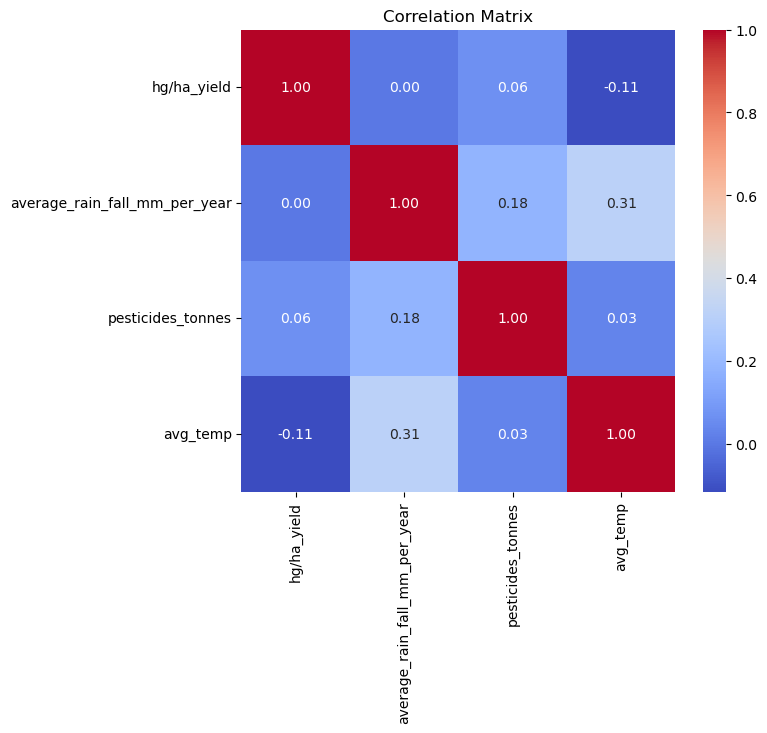

In [8]:
#Q4: WHAT IS THE RELATIONSHIP BETWEEN NUMERICAL FEATURES AND CROP YIELD?

#==SELECT NUMERICAL COLUMNS AND CALCULATE==
numerical_cols_for_corr = ["hg/ha_yield", "average_rain_fall_mm_per_year", "pesticides_tonnes", "avg_temp"]

correlation_matrix = yield_df[numerical_cols_for_corr].corr()
print("**Correlation with hg/ha_yield:**")
print(correlation_matrix["hg/ha_yield"].sort_values(ascending=False))

#VISUALIZATION
plt.figure(figsize=(7,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Matrix")
plt.show()

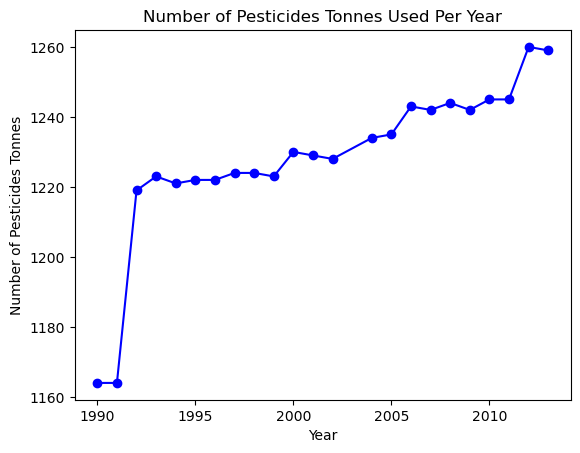

In [9]:
pesticides_tonnes_per_year = yield_df.groupby("Year")["pesticides_tonnes"].count().reset_index()

plt.plot(pesticides_tonnes_per_year["Year"], pesticides_tonnes_per_year["pesticides_tonnes"], color = "blue", marker = 'o')
plt.title("Number of Pesticides Tonnes Used Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Pesticides Tonnes")

plt.show()

In [10]:
yield_df_modelling = yield_df.copy()

if "Year" in yield_df_modelling.columns:
    yield_df_modelling = yield_df_modelling.drop("Year", axis = 1)
    print("Year column successfully dropped")
else:
    print("Year column already dropped")

yield_df = pd.get_dummies(yield_df_modelling, columns=["Area", "Item"], drop_first=True)

#DEFINING FEATURES (X) AND TARGET (y)
X = yield_df.drop("hg/ha_yield", axis=1)
y = yield_df["hg/ha_yield"]

#SPLITING DATA(80% TRAIN, 20% TEST)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###====Q1: PREDICTIVE ANALYSIS USING RANDOM FOREST MODEL
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=1, max_depth=15, min_samples_split=5)
model.fit(X_train, y_train)

##MAKING PREDICTIONS
y_pred = model.predict(X_test)

##EVALUATING THE MODEL
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print((f"R-squared (R2): {r2:.4f}"))
print("Model Performance (Random Forest)")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Year column successfully dropped
R-squared (R2): 0.9623
Model Performance (Random Forest)
Root Mean Squared Error (RMSE): 16280.46


In [11]:
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=1, max_depth=15, min_samples_split=5)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, min_samples_split=5, n_jobs=1,
                      random_state=42)

Top 10 Most Inflencial Features----
Item_Potatoes                    0.382922
Item_Rice, paddy                 0.077990
pesticides_tonnes                0.074554
Item_Sweet potatoes              0.066322
avg_temp                         0.055005
Area_India                       0.054068
average_rain_fall_mm_per_year    0.040636
Item_Maize                       0.028155
Item_Wheat                       0.023853
Item_Yams                        0.020915
dtype: float64


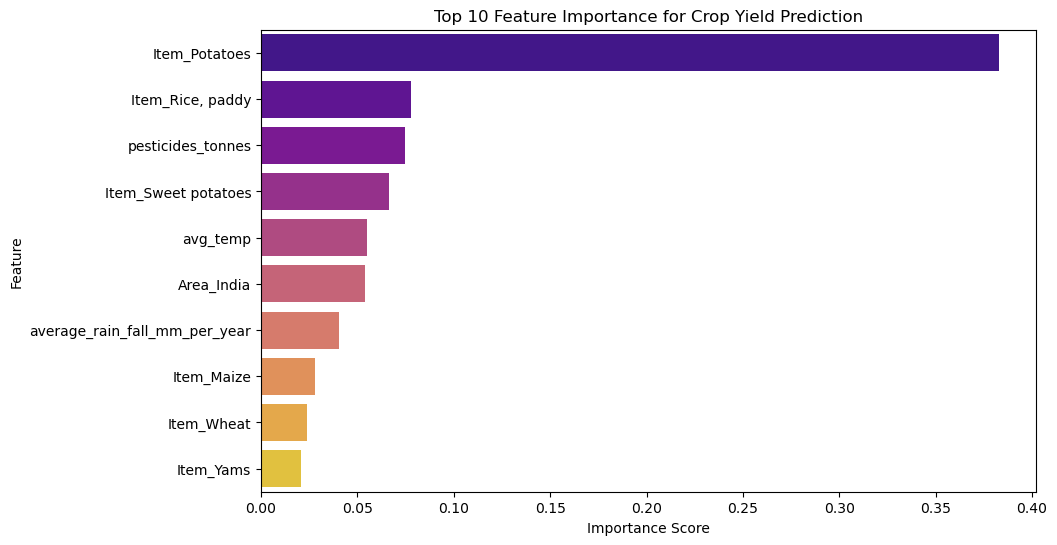

In [12]:
#Q2: WHICH FACTORS ARE THE MOST INFLUENTIAL IN DETERMINING CROP YIELD ?

##===GETTING FEATURE IMPORTANCE FROM THE TRAINED RANDOM FORESR MODEL
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)

##===SELECTING THE TOP 10 MOST IMPORTANT FEATURES
top_10_features = feature_importances.nlargest(10)

print("Top 10 Most Inflencial Features----")
print(top_10_features)

##===VISUALIZING THE IMPORTANCE
plt.figure(figsize=(10,6))
sns.barplot(x=top_10_features.values, y=top_10_features.index, palette="plasma")

plt.title("Top 10 Feature Importance for Crop Yield Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

In [13]:
#Q1: WHAT IS THE OPTIONAL CROP TO PLANT IN A SPECIFIC AREA GIVEN CERTAIN CONDITIONS
#Scenerio: Predict the yield for two different crops in a specific area under a given climate.
#Example: Area='India', Temp=25C, Rainfall=1000mm, Pesticides=2.0 tonnes

#===== PREPARING THE BASE FETURES FOR THE SCENERIO
base_features = {"average_rain_fall_mm_per_year": 1000, "pesticides_tonnes": 2.0, "avg_temp": 25}

#===== SELECTING TWO CROPS TO COMPARE (E.G., MAIZE VS WHEAT)
crops_to_compare = ["Maize", "Wheat"]
results ={}

print("Optional Crop Recommendation")

for crop in crops_to_compare:
    scenario_yield_df = pd.DataFrame(0, index=[0], columns=X.columns)

    #FILLING IN THE BASE NUMERICAL FEATURES
    for col, value in base_features.items():
        if col in scenario_yield_df.columns:
            scenario_yield_df[col] = value
    #FILLING IN TH CATEGORICAL FEATURS (AREA AND ITEM)
    try:
        #ASSUMING WE WANT TO TEST IN A SPECIFIC COUNTRY (E.G., "INDIA")
        scenario_yield_df[f'Area_India'] = 1 #Note: Using the exact encoded column name
        scenario_yield_df[f'Item_{crop}'] = 1

        #MAKING PREDICTION
        predicted_yield = model.predict(scenario_yield_df)[0]
        results[crop] = predicted_yield
        print(f'Predicted Yield for {crop} in India: {predicted_yield: ,.2f} hg/ha')
    except KeyError as e:
        print(f'Error: Encoded feature {e} not found. Ensure "India" and {crop} are in the training data.')

#DETERMINING THE BEST OPTION
if results:
    best_crop = max(results, key=results.get)
    
    print(f"Recommendation: The optimal crop to plant is {best_crop}. ")

Optional Crop Recommendation
Predicted Yield for Maize in India:  14,646.26 hg/ha
Predicted Yield for Wheat in India:  23,738.70 hg/ha
Recommendation: The optimal crop to plant is Wheat. 


In [14]:
#Q2: WHAT IS THE PREDICTED YIELD LOSS ASSOCIATED WITH A DROP IN RAINFALL?
#Scenario: Compare yield under Normal vs Drought conditions for a specific crop (Wheat in India)
crop = "Wheat"

#BASELINE (NORMAL) CONDITION
scenario_normal = base_features.copy()
scenario_normal["average_rain_fall_mm_per_year"] = 1000 #Normal rain

#STRESSED (DROUGHT) CONDITION
scenario_drought = base_features.copy()
scenario_drought["average_rain_fall_mm_per_year"] = 200 #20% less rain

#CREATING PREDICTION VECTORS (SIMILAR TO Q1)
yield_df_normal = pd.DataFrame(0, index=[0], columns=X.columns)
yield_df_drought = pd.DataFrame(0, index=[0], columns=X.columns)

#POPULATION VECTORS
for col, value in scenario_normal.items():
    if col in yield_df_normal.columns:
        yield_df_normal[col] = value
        yield_df_drought[col] = scenario_drought[col]

yield_df_normal[f'Area_India'] = 1
yield_df_normal[f'Item_{crop}'] = 1
yield_df_drought[f'Area_India'] = 1
yield_df_drought[f'Item_{crop}'] = 1

#MAKING PREDICTIONS
yield_normal = model.predict(yield_df_normal)[0]
yield_drought = model.predict(yield_df_normal)[0]
yield_loss = yield_normal - yield_drought
percent_loss = (yield_loss / yield_normal) * 100

print("Environmental Risk Assessment (Drought)")
print(f'Predicted Yield (Normal Rain - {scenario_normal["average_rain_fall_mm_per_year"]}mm):{yield_normal:,.0f} hg/ha')
print(f'Predicted Yield (Drought - {scenario_drought["average_rain_fall_mm_per_year"]}mm):{yield_drought:,.0f} hg/ha')
print(f'Predicted Yield Loss: {yield_loss:,.0f} hg/ha, or **{percent_loss:.2f}%**')

Environmental Risk Assessment (Drought)
Predicted Yield (Normal Rain - 1000mm):23,739 hg/ha
Predicted Yield (Drought - 200mm):23,739 hg/ha
Predicted Yield Loss: 0 hg/ha, or **0.00%**
